In [1]:
print('')

aim to plot change in gradient as consider changing minimum magntiude of data

In [2]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import pandas as pd
import math

import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from data_plotting_func import *

change magnitude limits, colors in functions file

In [5]:
filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20']

'''filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_005_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_01_new']

filenames = ['eq_object_05s_bandpass_01_19_snr_20_blank_0_new',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new', 
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new', 
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new']'''


"filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new',\n              'eq_object_03s_bandpass_01_19_snr_20_blank_005_new',\n              'eq_object_03s_bandpass_01_19_snr_20_blank_01_new']\n\nfilenames = ['eq_object_05s_bandpass_01_19_snr_20_blank_0_new',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new', \n             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new', \n             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new',\n      

## all on one plot

eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20


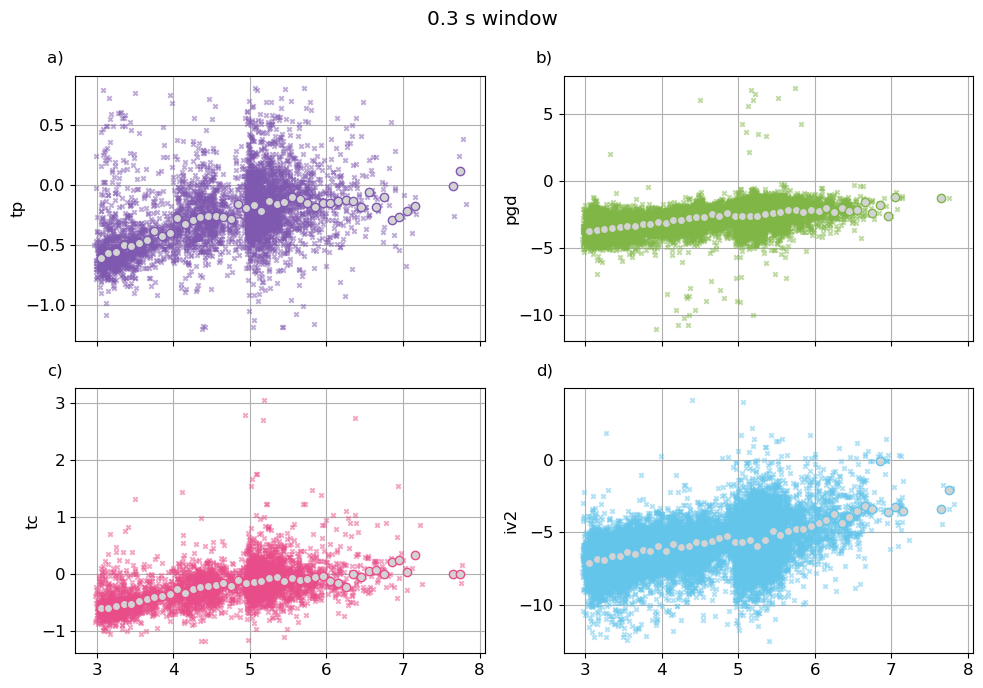

eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20


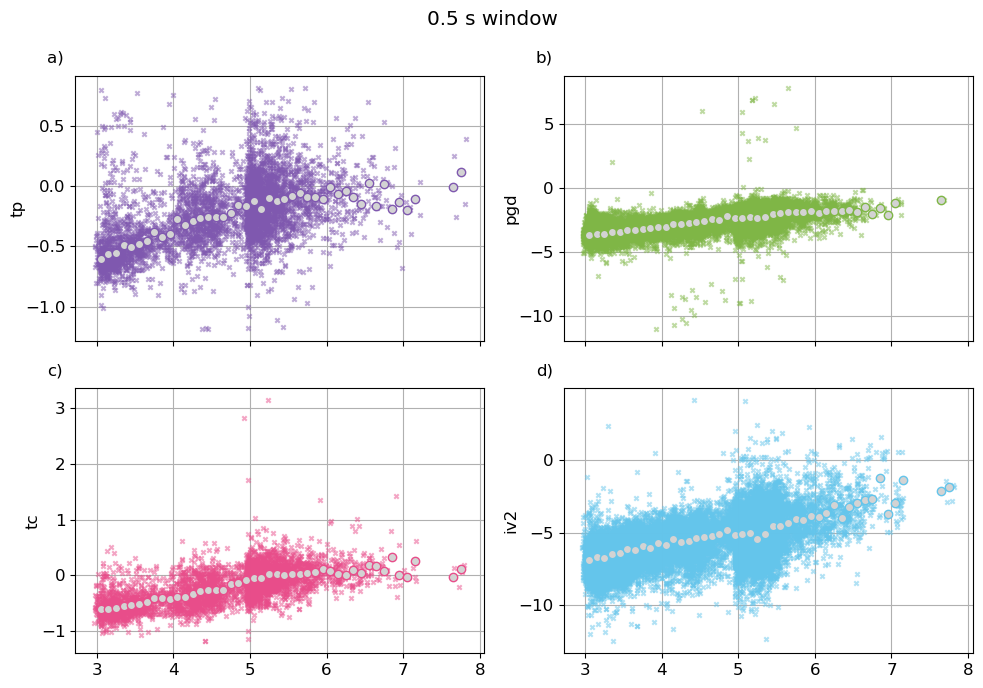

eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20


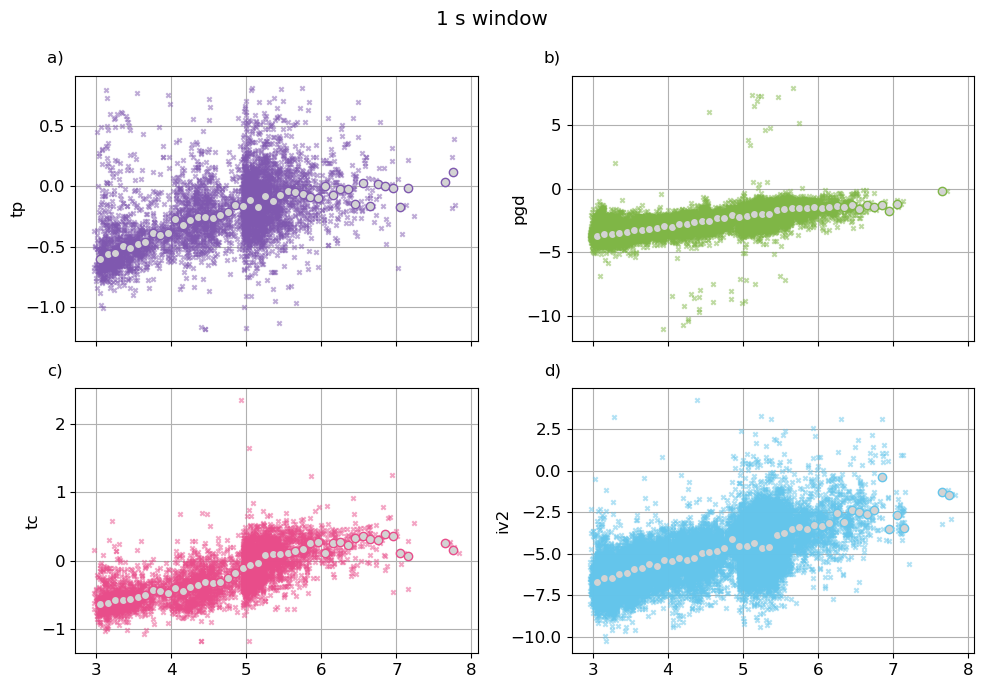

eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20


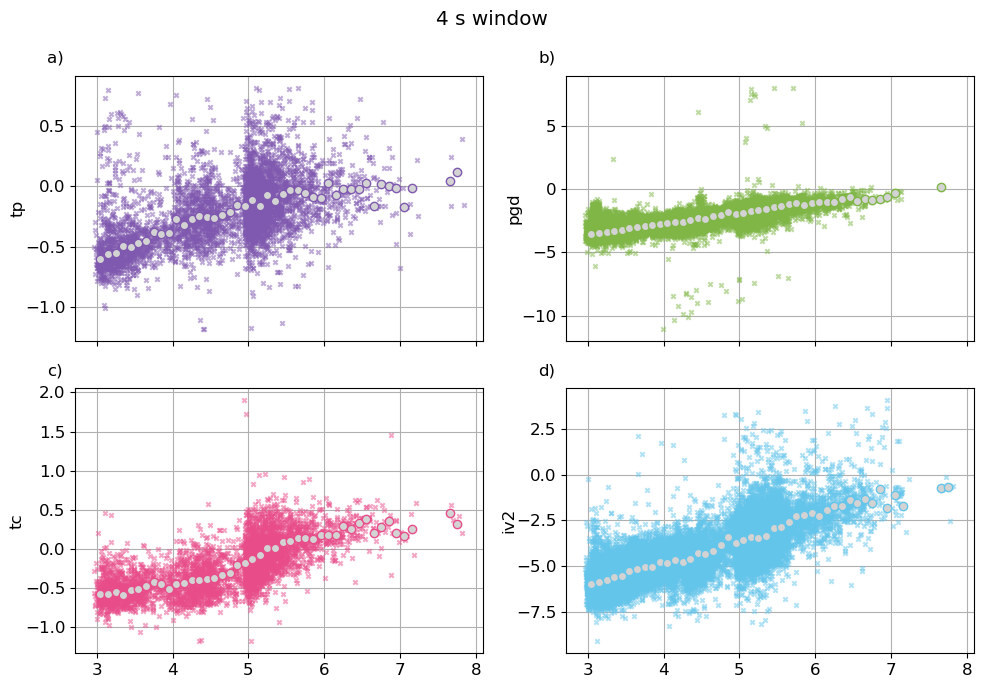

In [6]:

%matplotlib inline
for f in filenames:
    print(f)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')

    x_tp, y_tp = calc_tp_mag_lim(df, 3.)
    x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.)
    x_tc, y_tc = calc_tc_mag_lim(df, 3.)
    x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.)

    plot_data_subplots([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f)
        #plot_data_subplots_all_on_one_no_n_shaded(f, tp_params, pgd_params, iv2_params, tc_params, save = True)
        #print(tp_params[4][0], tc_params[4][0])
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'iv2', True) 

eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20


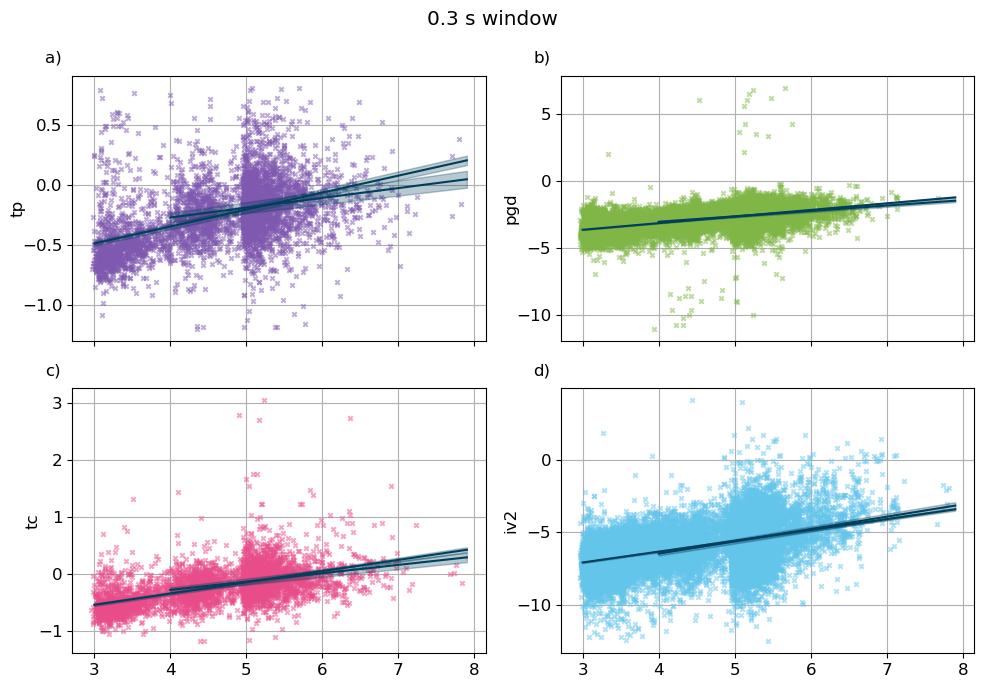

eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20


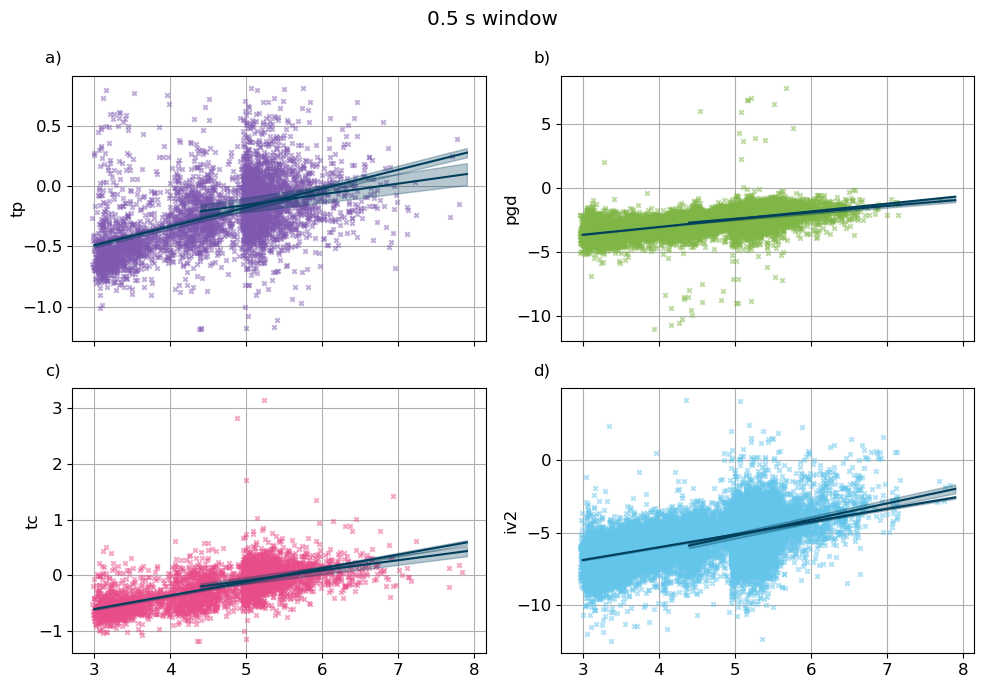

eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20


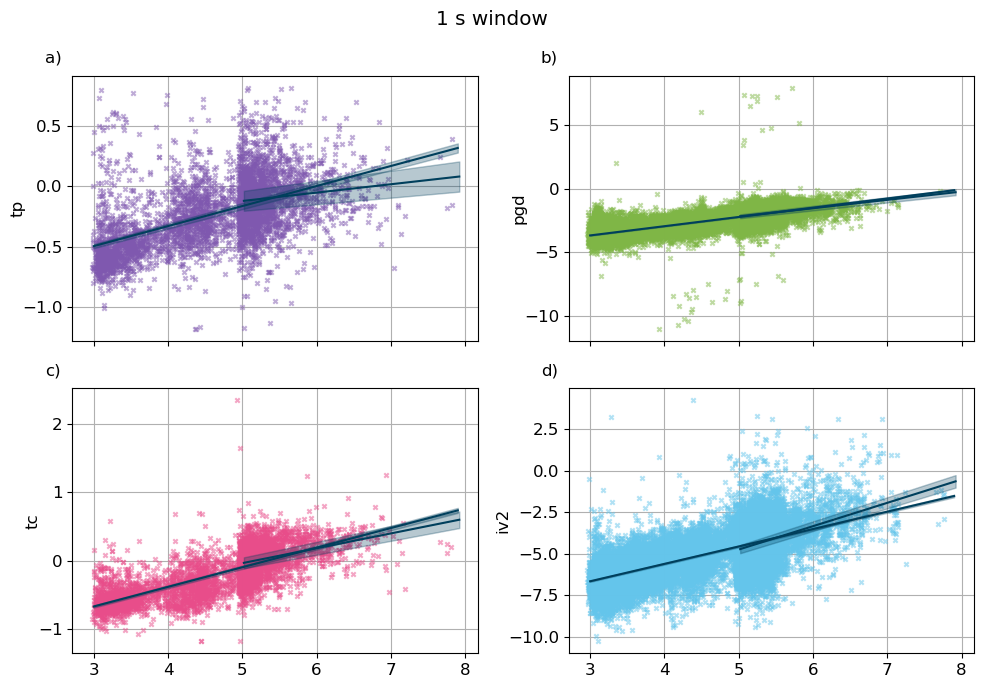

eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20


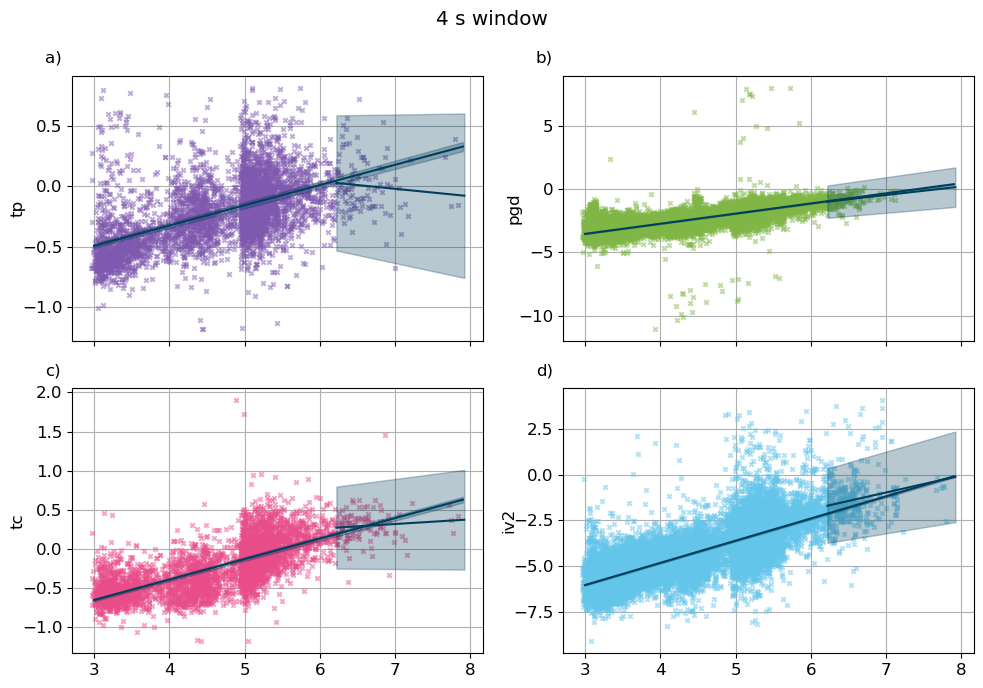

In [7]:
%matplotlib inline
for f in filenames:
    print(f)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')

    x_tp, y_tp = calc_tp_mag_lim(df, 3.)
    x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.)
    x_tc, y_tc = calc_tc_mag_lim(df, 3.)
    x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.)

    
    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_tp_mag_lim(df, mag_lim)
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    tp_params = [gradt, gradt_std, intercept, intercept_std,  'tp']

    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_pgd_mag_lim(df, mag_lim)
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)  
    pgd_params = [gradt, gradt_std, intercept, intercept_std,  'pgd']

    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_tc_mag_lim(df, mag_lim)
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)  
    tc_params = [gradt, gradt_std, intercept, intercept_std, 'tc']

    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_iv2_mag_lim(df, mag_lim)
        #print(len(x[y==0]))
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    iv2_params = [gradt, gradt_std, intercept, intercept_std, 'iv2']
    
    
    plot_data_subplots_line([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f, tp_params, pgd_params, tc_params, iv2_params)
    #plot_data_subplots_all_on_one_no_n_shaded(f, tp_params, pgd_params, iv2_params, tc_params, save = True)
    #print(tp_params[4][0], tc_params[4][0])
    #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'iv2', True) 
    


In [8]:
tp_params[1]

[0.004211563208239189,
 0.004552797258962659,
 0.004910042010747704,
 0.005303783641562809,
 0.005705469965740855,
 0.006187383392256988,
 0.006679155138842808,
 0.0070540475111543115,
 0.007290944510747833,
 0.007512989538752102,
 0.007802897650647676,
 0.00829105754617812,
 0.00885618258009657,
 0.009606829528184556,
 0.010426046544156332,
 0.01140217345415902,
 0.012069408792298104,
 0.012411469867220117,
 0.012686902209883444,
 0.012865257337625509,
 0.014417379135318115,
 0.01617469048967473,
 0.01864701609884964,
 0.02159577767647995,
 0.02412338350243693,
 0.026625246841750966,
 0.029741048298964772,
 0.03273201646011224,
 0.03816727516150312,
 0.04496852525489444,
 0.05172213276820174,
 0.059098645650156545,
 0.07097182629792129,
 0.07911034617196591,
 0.09611724765949999,
 0.10665154304761856,
 0.1311398195116804,
 0.17145027398512783,
 0.19901394350962195,
 0.2451076471351059,
 0.26377713589337204]